In [2]:
import pandas as pd
import json
import os 
import sys

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dir = os.path.join('dataset', 'kaggle-dse')

files = os.listdir(dir)
files.sort()
files = [f for f in files if f not in ['securities.json', 'prices_2008.json']]
print(files)

['prices_2009.json', 'prices_2010.json', 'prices_2011.json', 'prices_2012.json', 'prices_2013.json', 'prices_2014.json', 'prices_2015.json', 'prices_2016.json', 'prices_2017.json', 'prices_2018.json', 'prices_2019.json', 'prices_2020.json', 'prices_2021.json', 'prices_2022.json']


In [4]:
# load all the json files
data = []
for f in files:
    with open(os.path.join(dir, f)) as file:
        data.append(json.load(file))
len(data)

14

In [5]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

In [6]:
df.shape

(1612197, 11)

In [7]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,2010-12-30 00:00:00,1JANATAMF,12.9,13.9,12.3,12.3,13.0,12.0,4708,124.8680,9623500
1,2010-12-29 00:00:00,1JANATAMF,11.8,12.3,11.2,11.7,12.0,11.3,1680,46.8126,3987000
2,2010-12-28 00:00:00,1JANATAMF,11.3,11.7,11.0,11.0,11.3,11.2,1077,19.3689,1698500
3,2010-12-27 00:00:00,1JANATAMF,11.3,11.5,11.0,11.5,11.2,11.4,932,13.9884,1249000
4,2010-12-26 00:00:00,1JANATAMF,11.6,11.8,11.2,11.6,11.4,11.5,1671,31.8171,2746500


In [8]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'trading_code'])
df['trading_code'].value_counts()

trading_code
GP            3090
SANDHANINS    3090
ICBIBANK      3090
SAMORITA      3090
IDLC          3090
              ... 
TB2Y1024        40
GIB             31
TB5Y1127        11
IICICL          11
ICICL            9
Name: count, Length: 954, dtype: int64

In [9]:
top_companies = [
    "GP",
    "BATBC",
    "SQURPHARMA",
    "RENATA",
    "BEXIMCO",
    "BERGERPBL",
    "MARICO",
    "BRACBANK",
    "BXPHARMA",
    "ISLAMIBANK",
    "DUTCHBANGL",
    "EBL",
    "POWERGRID",
    "SUMITPOWER",
    "OLYMPIC",
    "PUBALIBANK",
    "CITYBANK",
    "ALARABANK",
    "PRIMEBANK",
    "IFIC",
    "RECKITTBEN",
    "NBL",
    "BSRMSTEEL",
    "BANKASIA",
    "SHAHJABANK",
    "MPETROLEUM",
    "LINDEBD",
    "BSC",
    "JAMUNAOIL",
    "PADMAOIL",
]

len(top_companies)

30

In [10]:
df = df[df['trading_code'].isin(top_companies)]

df['date'].value_counts()

date
2010-12-30 00:00:00    30
2018-07-17 00:00:00    30
2018-06-05 00:00:00    30
2018-06-04 00:00:00    30
2018-06-03 00:00:00    30
                       ..
2014-08-24 00:00:00    30
2014-08-21 00:00:00    30
2014-08-20 00:00:00    30
2014-08-19 00:00:00    30
2022-01-02 00:00:00    30
Name: count, Length: 3090, dtype: int64

In [11]:
df['trading_code'].value_counts()

trading_code
ALARABANK     3090
BANKASIA      3090
SQURPHARMA    3090
SHAHJABANK    3090
RENATA        3090
RECKITTBEN    3090
PUBALIBANK    3090
PRIMEBANK     3090
POWERGRID     3090
PADMAOIL      3090
OLYMPIC       3090
NBL           3090
MPETROLEUM    3090
MARICO        3090
LINDEBD       3090
JAMUNAOIL     3090
ISLAMIBANK    3090
IFIC          3090
GP            3090
EBL           3090
DUTCHBANGL    3090
CITYBANK      3090
BXPHARMA      3090
BSRMSTEEL     3090
BSC           3090
BRACBANK      3090
BEXIMCO       3090
BERGERPBL     3090
BATBC         3090
SUMITPOWER    3090
Name: count, dtype: int64

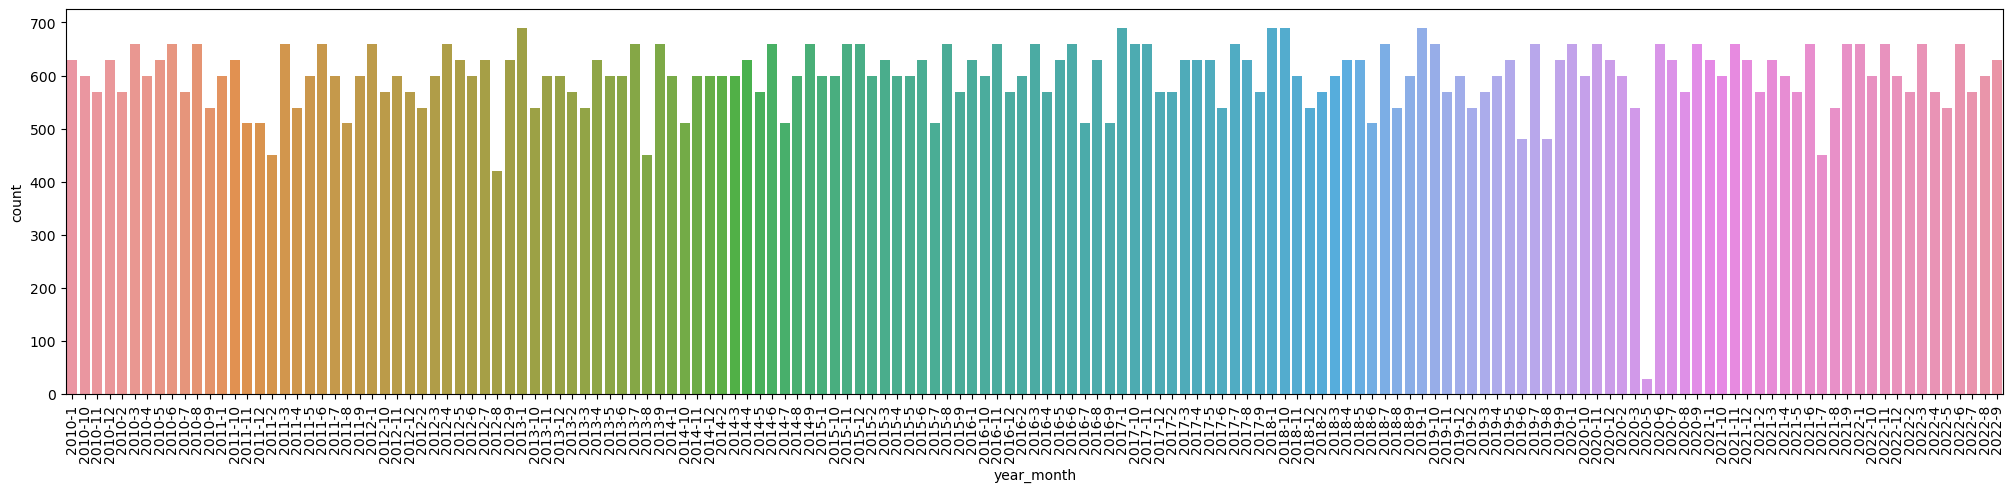

In [12]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [13]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1469
high                        1469
low                         1469
opening_price                522
closing_price                 29
yesterdays_closing_price       0
trade                       1472
value_mn                    1493
volume                      1472
year                           0
month                          0
year_month                     0
dtype: int64


In [14]:
# Calculate the mean values of each month for the columns high, low, opening, and closing
# mean_values = df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening', 'closing']].mean()
# Replace the zero values with the mean values
new_df = df.copy()
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1469
high                         312
low                          312
opening_price                 17
closing_price                  0
yesterdays_closing_price       0
trade                       1472
value_mn                    1493
volume                      1472
year                           0
month                          0
year_month                     0
dtype: int64


In [15]:
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1469
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1472
value_mn                    1493
volume                      1472
year                           0
month                          0
year_month                     0
dtype: int64


In [16]:
df = new_df.copy()

In [17]:
df['year'].value_counts()

year
2017    7440
2010    7320
2015    7320
2022    7320
2018    7260
2016    7230
2021    7200
2013    7140
2014    7140
2012    7110
2019    7110
2011    6870
2020    6240
Name: count, dtype: int64

In [18]:
# df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample 200 days for each year
for year, group in grouped_data:
    # Sample 200 unique days
    for t, g in group.groupby('trading_code'):
        sampled_days = g['date'].sample(208, replace=False)
        break
    # check the number of unique days
    print(len(sampled_days.unique()))
    
    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    # print(len(sampled_year_data))
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

208
208
208
208
208
208
208
208
208
208
208
208
208


In [19]:
sampled_data['year'].value_counts()

year
2010    6240
2011    6240
2012    6240
2013    6240
2014    6240
2015    6240
2016    6240
2017    6240
2018    6240
2019    6240
2020    6240
2021    6240
2022    6240
Name: count, dtype: int64

In [34]:
df = sampled_data.copy()

In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/home/ruhul/RL/Stock-Trader/.conda/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [22]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [23]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,year,month,year_month
0,2010-12-29,ALARABANK,65.7,65.7,63.7,63.8,65.2,63.4,3925,224.6406,3457250,2010,12,2010-12
1,2010-12-28,ALARABANK,63.6,63.9,61.5,61.8,63.4,61.8,2132,108.1101,1709500,2010,12,2010-12
2,2010-12-27,ALARABANK,62.1,62.9,61.5,62.0,61.8,61.2,2686,142.8922,2297000,2010,12,2010-12
3,2010-12-26,ALARABANK,61.2,61.5,59.0,60.2,61.2,60.3,1946,96.0948,1581500,2010,12,2010-12
4,2010-12-23,ALARABANK,60.7,61.4,60.0,61.4,60.3,60.1,1505,63.3073,1046250,2010,12,2010-12


In [35]:
df.drop(['year_month', 'last_traded_price', 'trade', 'value_mn','yesterdays_closing_price','month','year'], axis=1, inplace=True)
df.rename(columns={'trading_code': 'tic', 'opening_price': 'open', 'closing_price': 'close'}, inplace=True)
df.head()

,date,tic,high,low,open,close,volume
0,2010-12-29,ALARABANK,65.7,63.7,63.8,65.2,3457250
1,2010-12-28,ALARABANK,63.9,61.5,61.8,63.4,1709500
2,2010-12-27,ALARABANK,62.9,61.5,62.0,61.8,2297000
3,2010-12-26,ALARABANK,61.5,59.0,60.2,61.2,1581500
4,2010-12-23,ALARABANK,61.4,60.0,61.4,60.3,1046250


In [36]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [37]:
df.dtypes

date                datetime64[ns]
tic                         object
high                       float64
low                        float64
open                       float64
close                      float64
volume                       int64
day                          int32
short_resistance           float64
short_support              float64
long_resistance            float64
long_support               float64
dtype: object

In [38]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [39]:
print(df.shape)
df.head()

(81120, 12)


,date,tic,high,low,open,close,volume,day,short_resistance,short_support,long_resistance,long_support
0,2010-01-03,ALARABANK,530.00,516.0,530.0,522.25,128350,6,532.0,502.0,614.0,481.0
1,2010-01-03,BANKASIA,459.75,437.0,437.0,452.00,298550,6,495.0,431.0,590.0,431.0
2,2010-01-03,BATBC,436.00,407.6,414.9,432.10,467500,6,464.9,407.6,577.0,407.6
3,2010-01-03,BERGERPBL,679.90,626.0,639.0,666.80,123850,6,722.0,626.0,728.0,525.0
4,2010-01-03,BEXIMCO,321.00,310.1,310.1,319.90,2230100,6,327.9,310.1,398.4,310.1


In [40]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 252
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 252])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(df_price_pivot.index)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

Index(['2010-01-03', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-17', '2010-01-18',
       ...
       '2022-12-14', '2022-12-15', '2022-12-18', '2022-12-19', '2022-12-20',
       '2022-12-21', '2022-12-22', '2022-12-26', '2022-12-28', '2022-12-29'],
      dtype='object', name='date', length=2704)
2704


In [41]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)

/home/ruhul/RL/Stock-Trader/.conda/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Successfully added technical indicators
Shape of DataFrame:  (3270, 8)


Successfully added vix


In [42]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [43]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,high,low,open,close,volume,day,short_resistance,short_support,...,long_support,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix
0,2010-01-04,ALARABANK,532.00000,513.000000,532.0,522.00,93350.0,0.0,532.0,502.000000,...,481.000000,-0.005609,522.478553,521.771447,0.0,-66.666667,100.0,522.125,522.125,20.040001
1,2010-01-04,BANKASIA,476.00000,446.000000,448.0,472.75,192600.0,0.0,495.0,431.000000,...,431.000000,0.465545,491.719931,433.030069,100.0,66.666667,100.0,462.375,462.375,20.040001
2,2010-01-04,BATBC,433.90000,422.500000,430.1,424.60,265050.0,0.0,464.9,420.100000,...,420.100000,-0.168269,438.956602,417.743398,0.0,66.666667,100.0,428.350,428.350,20.040001
3,2010-01-04,BERGERPBL,689.00000,649.200000,666.1,676.80,103100.0,0.0,722.0,644.000000,...,525.000000,0.224359,685.942136,657.657864,100.0,66.666667,100.0,671.800,671.800,20.040001
4,2010-01-04,BEXIMCO,324.00000,313.300000,320.0,313.60,2002200.0,0.0,327.9,312.600000,...,312.600000,-0.141346,325.659545,307.840455,0.0,-66.666667,100.0,316.750,316.750,20.040001
5,2010-01-04,BRACBANK,709.75000,682.500000,682.5,707.00,205250.0,0.0,773.0,682.500000,...,542.000000,0.443109,725.055718,669.194282,100.0,66.666667,100.0,697.125,697.125,20.040001
6,2010-01-04,BSC,1814.22619,1740.761905,5490.0,5490.00,0.0,0.0,5350.0,1740.761905,...,172.727273,0.000000,5490.000000,5490.000000,100.0,66.666667,100.0,5490.000,5490.000,20.040001
7,2010-01-04,BSRMSTEEL,1087.75000,1041.000000,1050.0,1081.25,61700.0,0.0,1246.0,1041.000000,...,1041.000000,1.004006,1122.161057,995.588943,100.0,66.666667,100.0,1058.875,1058.875,20.040001
8,2010-01-04,BXPHARMA,161.90000,157.900000,161.9,158.90,410200.0,0.0,173.0,157.900000,...,157.900000,-0.029167,161.388478,157.711522,0.0,66.666667,100.0,159.550,159.550,20.040001
9,2010-01-04,CITYBANK,733.00000,707.000000,711.0,725.00,84655.0,0.0,735.0,676.000000,...,676.000000,0.235577,734.599242,704.900758,100.0,-66.666667,100.0,719.750,719.750,20.040001


In [44]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [45]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-12-31'
TRADE_START_DATE = '2021-01-01'
TRADE_END_DATE = '2022-12-31'
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

53280
9870


In [46]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [47]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [48]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [49]:
agent = DRLAgent(env = env_train)

if_using_a2c = False
if_using_ddpg = True
if_using_ppo = False
if_using_td3 = False
if_using_sac = False

In [50]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [51]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 54       |
|    time_elapsed    | 129      |
|    total_timesteps | 7104     |
| train/             |          |
|    actor_loss      | -1.17    |
|    critic_loss     | 2.55     |
|    learning_rate   | 0.001    |
|    n_updates       | 7003     |
|    reward          | 0.1933   |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 53       |
|    time_elapsed    | 266      |
|    total_timesteps | 14208    |
| train/             |          |
|    actor_loss      | 1.57     |
|    critic_loss     | 1.58     |
|    learning_rate   | 0.001    |
|    n_updates       | 14107    |
|    reward          | 0.1933   |
---------------------------------
day: 1775, episode: 10
begin_total_asset: 1000000.00
end_total_asset: 375060.21
total_reward: -624939.79
total_cost:

In [55]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [57]:
insample_risk_indicator.vix.describe()

count    1776.000000
mean       17.820231
std         7.047748
min         9.150000
25%        13.270000
50%        15.960000
75%        20.102500
max        82.690002
Name: vix, dtype: float64

In [58]:
insample_risk_indicator.vix.quantile(0.996)

54.40399932861333

In [59]:
insample_risk_indicator.turbulence.describe()

AttributeError: 'DataFrame' object has no attribute 'turbulence'

In [ ]:
insample_risk_indicator.turbulence.quantile(0.996)

In [60]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [61]:
trade.head()

,date,tic,high,low,open,close,volume,day,short_resistance,short_support,...,long_support,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix
0,2021-01-04,ALARABANK,22.6,21.8,21.9,22.5,717244.0,0.0,23.7,21.8,...,20.1,0.322759,23.328288,21.411712,61.391528,18.103009,27.276166,22.166667,20.196667,26.969999
0,2021-01-04,BANKASIA,18.4,18.0,18.0,18.3,371753.0,0.0,19.6,17.8,...,16.2,-0.038393,18.691655,17.878345,50.953183,-6.572295,3.393566,18.256667,18.373333,26.969999
0,2021-01-04,BATBC,1294.5,1221.0,1258.0,1252.2,182422.0,0.0,1459.0,1184.0,...,520.7,29.643947,1200.395985,1001.324015,71.223154,315.000756,69.037947,1079.743333,1084.458333,26.969999
0,2021-01-04,BERGERPBL,1474.6,1431.0,1431.0,1467.0,8098.0,0.0,1633.0,1420.0,...,1420.0,21.127154,1491.459239,1347.550761,60.313867,101.919553,49.031550,1390.296667,1367.438333,26.969999
0,2021-01-04,BEXIMCO,67.0,58.0,64.0,65.7,40368233.0,0.0,90.0,58.0,...,58.0,8.253699,60.727591,16.332409,86.801931,233.731429,85.949202,33.620000,28.401667,26.969999


In [62]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

NameError: name 'trained_a2c' is not defined

In [63]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [65]:
df_account_value_ddpg.max()

date               2022-12-28
account_value    1209371.6485
dtype: object

In [ ]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

In [ ]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

In [ ]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

In [ ]:
df_account_value_a2c

,date,account_value
0,2009-01-26,1000000.00000
1,2009-01-27,982649.50705
2,2009-01-28,994245.65155


In [ ]:
df_actions_a2c

,1STBSRS,6THICB,8THICB,ABBANK,ACI,ACIFORMULA,AFTABAUTO,AGNISYSL,AGRANINS,AIMS1STMF,...,TITASGAS,TRUSTBANK,ULC,UNIONCAP,UNITEDINS,USMANIAGL,UTTARABANK,UTTARAFIN,WONDERTOYS,ZEALBANGLA
date,,,,,,,,,,,,,,,,,,,,,
2009-01-26,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0
2009-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='7'></a>
# Part 6.5: Mean Variance Optimization

In [ ]:
mvo_df.head()

,date,tic,close
0,2009-01-05,1STBSRS,860.50
1,2009-01-05,6THICB,581.25
2,2009-01-05,8THICB,555.75
3,2009-01-05,ABBANK,795.25
4,2009-01-05,ACI,524.80


In [ ]:
fst = mvo_df
fst = fst.iloc[0*29:0*29+29, :]
tic = fst['tic'].tolist()

mvo = pd.DataFrame()

for k in range(len(tic)):
  mvo[tic[k]] = 0

for i in range(mvo_df.shape[0]//29):
  n = mvo_df
  n = n.iloc[i*29:i*29+29, :]
  date = n['date'][i*29]
  mvo.loc[date] = n['close'].tolist()

In [ ]:
mvo.shape[0]

13

### Helper functions

In [ ]:
from scipy import optimize
from scipy.optimize import linprog

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):

  #dependencies


  c = (np.multiply(-1, MeanReturns))
  A = np.ones([PortfolioSize,1]).T
  b=[1]
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex')

  return res

def MinimizeRisk(CovarReturns, PortfolioSize):

  def f(x, CovarReturns):
    func = np.matmul(np.matmul(x, CovarReturns), x.T)
    return func

  def constraintEq(x):
    A=np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b
    return constraintVal

  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq})
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)

  return opt

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):

  def  f(x,CovarReturns):

    func = np.matmul(np.matmul(x,CovarReturns ), x.T)
    return func

  def constraintEq(x):
    AEq=np.ones(x.shape)
    bEq=1
    EqconstraintVal = np.matmul(AEq,x.T)-bEq
    return EqconstraintVal

  def constraintIneq(x, MeanReturns, R):
    AIneq = np.array(MeanReturns)
    bIneq = R
    IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
    return IneqconstraintVal


  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq},
          {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)

  return opt

In [ ]:
def StockReturnsComputing(StockPrice, Rows, Columns):
  import numpy as np
  StockReturn = np.zeros([Rows-1, Columns])
  for j in range(Columns):        # j: Assets
    for i in range(Rows-1):     # i: Daily Prices
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

  return StockReturn

### Calculate mean returns and variance-covariance matrix

In [ ]:
# Obtain optimal portfolio sets that maximize return and minimize risk

#Dependencies
import numpy as np
import pandas as pd


#input k-portfolio 1 dataset comprising 15 stocks
# StockFileName = './DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = 1259  #excluding header
Columns = 15  #excluding date
portfolioSize = 29 #set portfolio size

#read stock prices in a dataframe
# df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
# assetLabels = df.columns[1:Columns+1].tolist()
# print(assetLabels)

#extract asset prices
# StockData = df.iloc[0:, 1:]
StockData = mvo.head(mvo.shape[0]-336)
TradeData = mvo.tail(336)
# df.head()
TradeData.to_numpy()


array([[ 117.2 , 3110.  ,  159.75,  219.  , 1005.  ,  236.  ,   65.  ,
         510.  ,  419.5 ,  763.25,  119.5 , 1763.  , 2014.75, 3228.  ,
         770.25,   40.  ,   22.  ,  843.5 ,  565.5 ,  532.5 ,  784.75,
         504.7 ,  207.6 ,  354.5 ,   61.5 ,  298.25,   15.34,  423.  ,
          68.25],
       [1991.  , 3161.25,  744.  ,   41.25,   22.4 ,  839.5 ,  564.75,
         531.25,  783.75,  505.5 ,  205.5 ,  362.  ,   62.2 ,  305.25,
          15.56,  418.25,   68.75,  128.6 , 1102.75,   60.5 , 2323.25,
         909.25,  469.5 ,  932.25,  281.1 ,  186.25,    8.8 ,  224.75,
         298.8 ],
       [  42.4 ,  207.  ,  149.5 ,  306.75,  100.  ,  115.1 , 3062.5 ,
         163.5 ,  215.  , 1079.5 ,  228.  ,   66.5 ,  493.75,  415.75,
         760.  ,  115.  , 1804.  , 1981.75, 3185.25,  735.25,   40.25,
          21.3 ,  840.25,  567.75,  544.25,  776.  ,  505.5 ,  212.9 ,
         346.25],
       [ 502.  ,  407.75,  729.75,  114.9 , 1663.5 , 1907.75, 3106.75,
         728.75,   40.7

In [ ]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)


ValueError: negative dimensions are not allowed

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([1000000 * cleaned_weights_mean[i] for i in range(29)])
mvo_weights

In [ ]:
StockData.tail(1)

In [ ]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

In [ ]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

<a id='6'></a>
# Part 7: Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [ ]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])
df_account_value_a2c.to_csv("df_account_value_a2c.csv")
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)
stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_a2c['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji.to_csv("df_dji+.csv")

result = pd.merge(df_result_a2c, df_result_ddpg, left_index=True, right_index=True, suffixes=('_a2c', '_ddpg'))
result = pd.merge(result, df_result_td3, left_index=True, right_index=True, suffixes=('', '_td3'))
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True, suffixes=('', '_ppo'))
result = pd.merge(result, df_result_sac, left_index=True, right_index=True, suffixes=('', '_sac'))
result = pd.merge(result, MVO_result, left_index=True, right_index=True, suffixes=('', '_mvo'))
result = pd.merge(result, df_dji, left_index=True, right_index=True, suffixes=('', '_dji'))
result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mean var', 'dji']

print("result: ", result)
result.to_csv("result.csv")

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();